In [1]:
%load_ext autoreload
%autoreload 2
from system.bio_model.cognitive_map import LifelongCognitiveMap
import system.plotting.plotResults as plot
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Displaying different maps

In [3]:
def draw_map(file, env_model):
    cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=file, debug=False)
    print(f"{file} ({len(cognitive_map.node_network.nodes)} nodes)")
    plot.plotTrajectoryInEnvironment(env_model=env_model, cognitive_map=cognitive_map, trajectory=False)

linear_sunburst.after_lifelong_learning.gpickle (25 nodes)


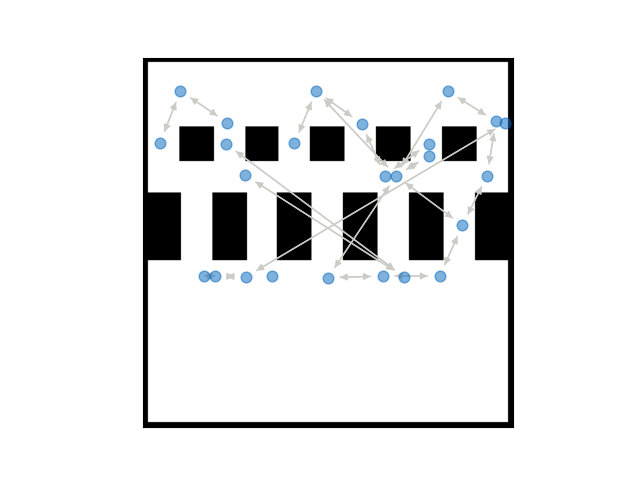

In [3]:
draw_map("linear_sunburst.after_lifelong_learning.gpickle", "linear_sunburst")

cognitive_map_partial_2.gpickle (97 nodes)


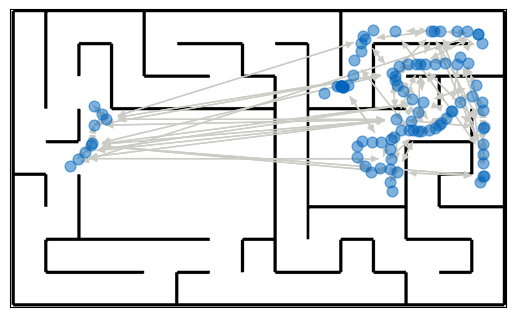

disjoint.gpickle (201 nodes)


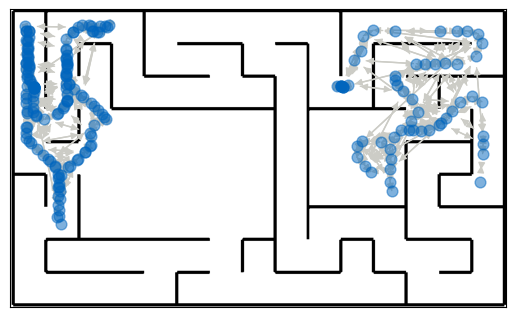

handcrafted.gpickle (99 nodes)


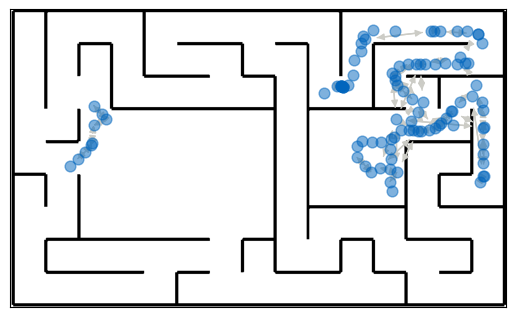

after_lifelong_learning.gpickle (98 nodes)


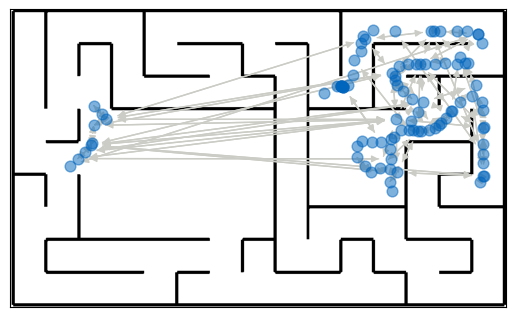

cognitive_map_full.gpickle (102 nodes)


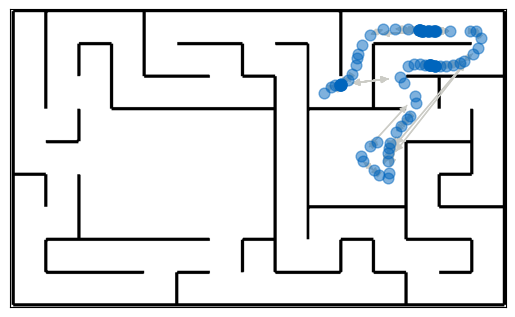

linear_sunburst.handcrafted.gpickle (28 nodes)


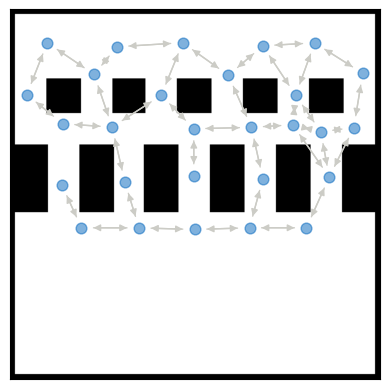

linear_sunburst.after_lifelong_learning.gpickle (25 nodes)


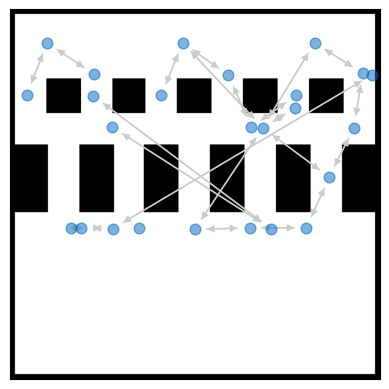

after_exploration.gpickle (77 nodes)


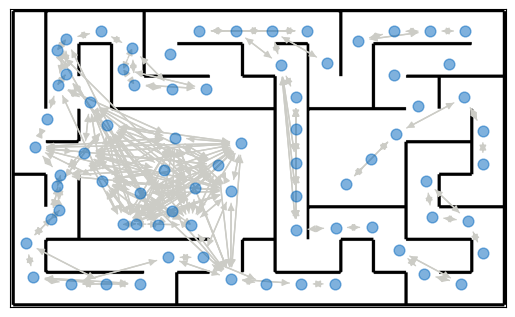

cognitive_map_partial.gpickle (60 nodes)


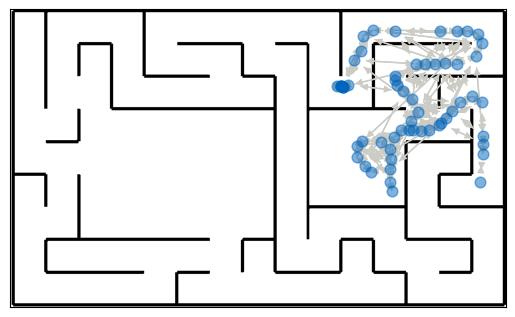

linear_sunburst.after_exploration+re--network.gpickle (27 nodes)


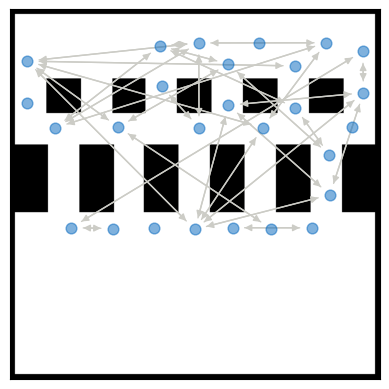

linear_sunburst.after_exploration.gpickle (18 nodes)


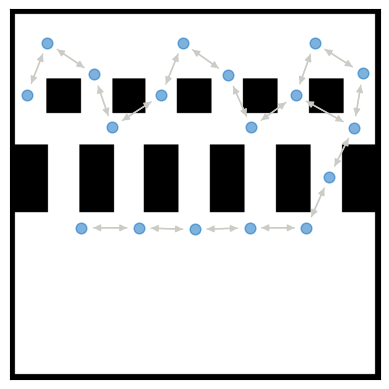

cognitive_map_partial_3.gpickle (141 nodes)


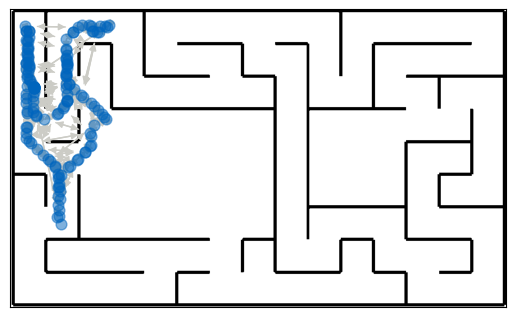

In [4]:
import os
for filename in os.listdir("../system/bio_model/data/cognitive_map"):
    match filename.split("."):
        case (env_model, _type, "gpickle"):
            draw_map(filename, env_model)
        case (type, "gpickle"):
            draw_map(filename, "Savinov_val3")

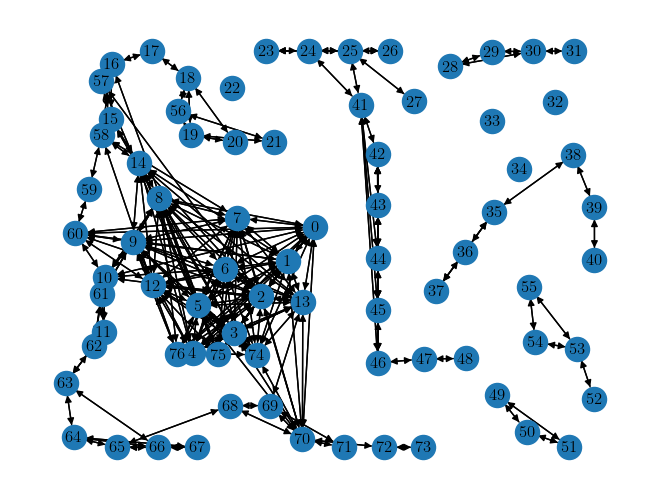

In [7]:
map_name = "after_exploration.gpickle"
map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=True)

## Computing grid cell drift

In [6]:
from system.controller.simulation.pybullet_environment import PybulletEnvironment
from system.controller.local_controller.local_navigation import setup_gc_network

map_file = 'after_exploration.gpickle'
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file)
with PybulletEnvironment(env_model="linear_sunburst") as env:
    gc_network = setup_gc_network(env.dt)
    cognitive_map.test_place_cell_network(env, gc_network)

Decoding goal vector to place Cell 0 out of 77


KeyboardInterrupt: 

## Getting reachability from map nodes

In [2]:
map_file = "linear_sunburst.after_lifelong_learning.gpickle"
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False)

In [8]:
import networkx as nx

node_network = cognitive_map.node_network
positions = { node: nodeval['pos'] for node, nodeval in node_network.nodes.items() }

def draw_network_with_re(re):
    fig, axes = plt.subplots(1, 2)
    reachabilities = []
    for start, end in node_network.edges:
        reachabilities.append(re.reachability_factor(start, end))
    reachabilities_binary = [ (0, 0.5, 0) if edge > re.threshold_reachable else (1, 0.5, 0.5) for edge in reachabilities ]
    nx.draw_networkx(node_network, node_size=120, with_labels=False, pos=positions, edge_color=reachabilities, ax=axes[0])
    nx.draw_networkx(node_network, node_size=120, with_labels=False, pos=positions, edge_color=reachabilities_binary, ax=axes[1])
    plt.show()

from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory

##### Spikings

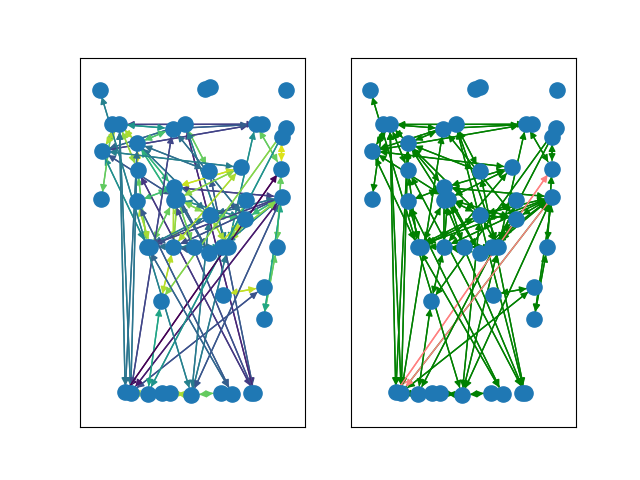

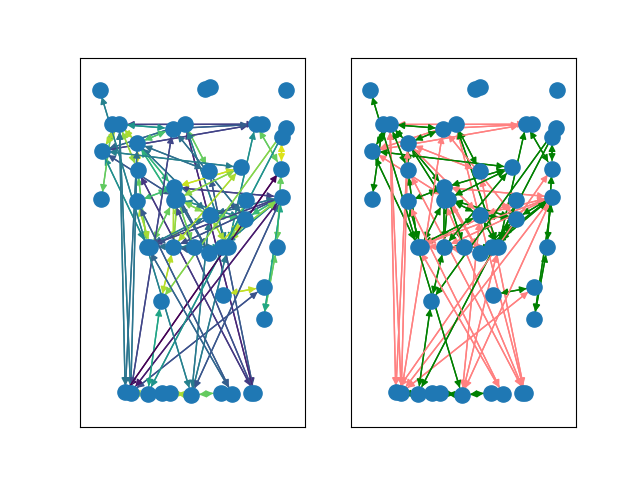

In [9]:
re = reachability_estimator_factory('spikings')
draw_network_with_re(re)
re.threshold_reachable = 0.6
draw_network_with_re(re)

##### View_overlap

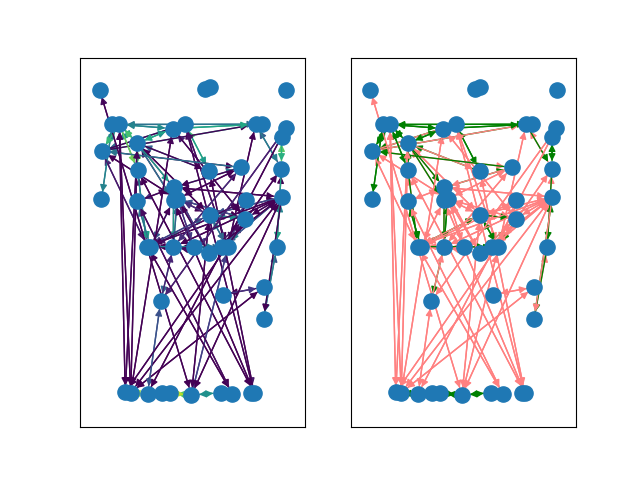

In [10]:
draw_network_with_re(reachability_estimator_factory('view_overlap', env_model='linear_sunburst'))

###### Checking why the ViewOverlap controller doesn't work

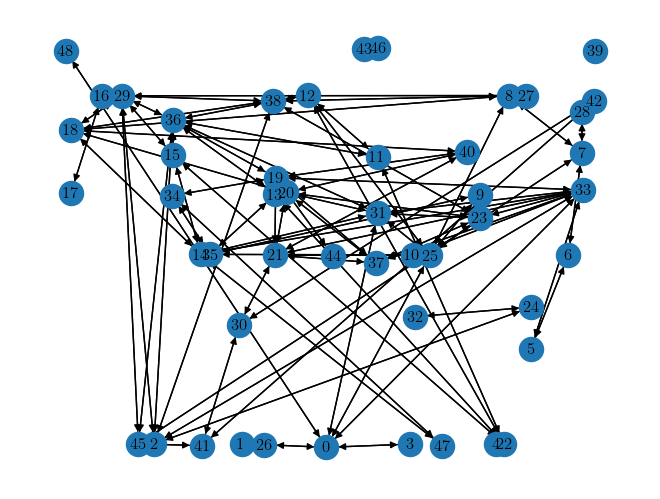

    def reachability_factor(self, start: PlaceInfo, goal: PlaceInfo) -> float:
        """ Reachability Score based on the view overlap of start and goal in the environment """
        # untested and unfinished
        start_pos = start.pos
        goal_pos = goal.pos

        heading1 = np.degrees(np.arctan2(goal_pos[0] - start_pos[0], goal_pos[1] - start_pos[1]))

        overlap_ratios = self.map_layout.view_overlap(start_pos, heading1, goal_pos, heading1, self.fov, mode='plane')

        return (overlap_ratios[0] + overlap_ratios[1]) / 2


In [8]:
re = reachability_estimator_factory('view_overlap', env_model='linear_sunburst')
%psource re.reachability_factor
nodes = list(node_network.nodes)
cognitive_map.draw()

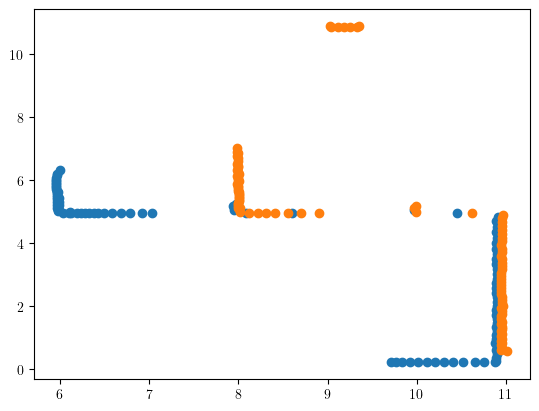

88.21659538329148 (0.36, 0.67)


In [9]:
import numpy as np
start, goal = nodes[0], nodes[3]
start_pos = start.pos
goal_pos = goal.pos

heading1 = np.degrees(np.arctan2(goal_pos[0] - start_pos[0], goal_pos[1] - start_pos[1]))
overlap_ratios = re.map_layout.view_overlap(start_pos, heading1, goal_pos, heading1, re.fov, mode='plane', vis=True)
print(heading1, overlap_ratios)

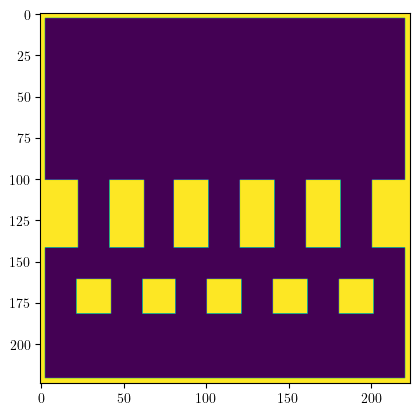

In [10]:
import matplotlib.pyplot as plt
plt.imshow(re.map_layout.binary_occupancy)

##### Network

In [26]:
!ls ../system/controller/reachability_estimator/data/models/

autoencoder0.25
autoencoder100.25
autoencoder1.25
autoencoder16.25
autoencoder20.25
autoencoder4.25
autoencoder50.10
autoencoder50.15
autoencoder50.20
autoencoder50.25
autoencoder50.5
autoencoder80.10
autoencoder80.15
autoencoder80.20
autoencoder80.25
autoencoder80.5
no_siamese_mse_updated.10
no_siamese_mse_updated.15
no_siamese_mse_updated.5
reachability_network-260624-3colors+lidar--ego_bc.25
reachability_network-260624-3colors+spikings+lidar--raw_lidar+conv.25
reachability_network-260624-boolor+spikings+lidar--raw_lidar+conv.25
reachability_network-260624+dist.25
reachability_network-260624+lidar--raw_lidar+conv.25
reachability_network-260624+spikings+conv.25
reachability_network-260624+spikings+lidar--allo_bc+conv.25
reachability_network-260624+spikings+lidar--ego_bc+conv.25
reachability_network-260624+spikings+lidar--raw_lidar.25
reachability_network-260624+spikings+lidar--raw_lidar+conv.25
reachability_network-260624+spikings+lidar--raw_lidar+dist+conv.25
reachability_network-260

[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


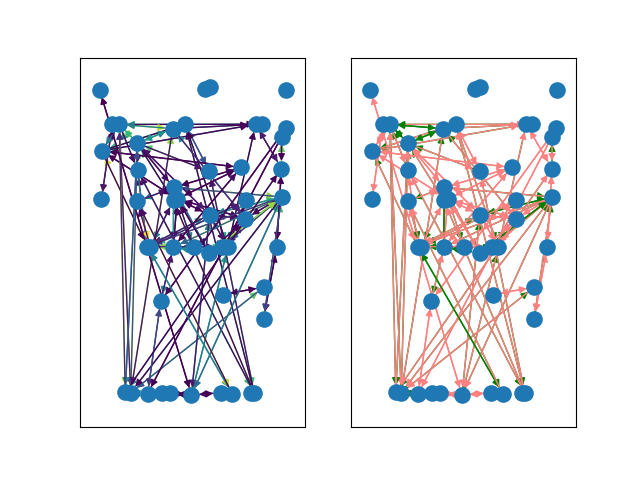

In [11]:
from system.controller.reachability_estimator.ReachabilityDataset import SampleConfig

draw_network_with_re(reachability_estimator_factory(
    'neural_network',
    weights_file='re_mse_weights.50',
    config=SampleConfig(grid_cell_spikings=True)
))

2024-07-26 19:02:13.851319: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


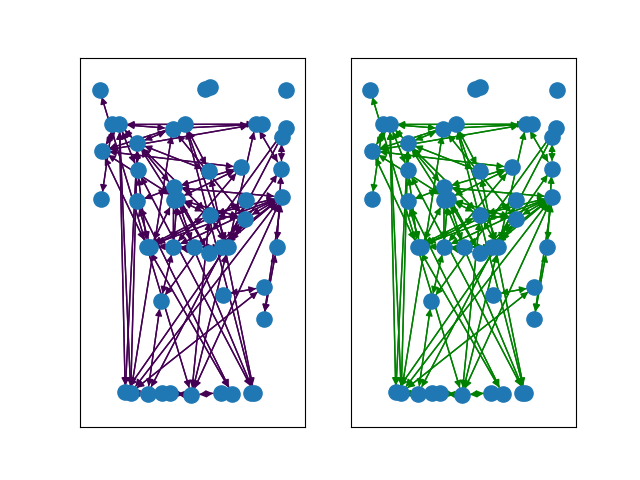

In [13]:
from system.controller.reachability_estimator.training.train_multiframe_dst import Hyperparameters

draw_network_with_re(reachability_estimator_factory(
    'neural_network',
    weights_file='reachability_network-260624+spikings+conv.25',
    config=SampleConfig(grid_cell_spikings=True),
    backbone_classname='convolutional',
))

### Checking where that reachability comes from

In [3]:
re.threshold_reachable

0.3

In [4]:
nodes = list(cognitive_map.node_network.nodes)
def get_factor(i, j):
    (node_i, node_j) = (nodes[x] for x in (i, j))
    re_factor = re.reachability_factor(node_i, node_j)
    try:
        saved_factor = cognitive_map.node_network.edges[node_i, node_j]['connectivity_probability']
    except KeyError:
        saved_factor = None
    return re_factor, saved_factor
get_factor(0, 1)

(0.7150000000000001, 0.7150000000000001)

In [6]:
from itertools import pairwise
for i, j in pairwise(range(len(nodes))):
    print(f'[{i}] -> [{j}]:', get_factor(i, j), get_factor(j, i))

[0] -> [1]: (0.7150000000000001, 0.7150000000000001) (0.7849999999999999, 0.7150000000000001)
[1] -> [2]: (0.75, 0.75) (0.75, 0.75)
[2] -> [3]: (0.745, 0.745) (0.775, 0.745)
[3] -> [4]: (0.635, 0.635) (0.815, 0.635)
[4] -> [5]: (0.7050000000000001, 0.7050000000000001) (0.69, 0.7050000000000001)
[5] -> [6]: (0.7849999999999999, 0.7849999999999999) (0.76, 0.7849999999999999)
[6] -> [7]: (0.77, 0.77) (0.71, 0.77)
[7] -> [8]: (0.36, 0.36) (0.66, 0.36)
[8] -> [9]: (0.59, 0.59) (0.515, 0.59)
[9] -> [10]: (0.36, 0.36) (0.435, 0.36)
[10] -> [11]: (0.305, 0.305) (0.27, 0.305)
[11] -> [12]: (0.0, None) (0.025, None)
[12] -> [13]: (0.62, 0.62) (0.445, 0.62)
[13] -> [14]: (0.505, 0.505) (0.22, 0.505)
[14] -> [15]: (0.66, 0.66) (0.195, 0.66)
[15] -> [16]: (0.42, 0.42) (0.43500000000000005, 0.42)
[16] -> [17]: (0.6950000000000001, 0.6950000000000001) (0.3, 0.6950000000000001)
[17] -> [18]: (0.32, 0.32) (0.505, 0.32)
[18] -> [19]: (0.61, 0.61) (0.56, 0.61)
[19] -> [20]: (0.47, 0.47) (0.61, 0.47)
[20]

#### Some more stats
to debug if the reachability does not make sense

In [17]:
import numpy as np
from system.controller.reachability_estimator.types import PlaceInfo
for i, j in pairwise(range(18)):
    node_i, node_j = nodes[i], nodes[j]
    middle = (node_i.pos + node_j.pos) / 2
    node_ij = PlaceInfo(pos=middle, angle=0, lidar=None, img=None, spikings=None)
    print(f'[{i}] -({re.reachability_factor(node_i, node_ij)})> [{i}.5] -({re.reachability_factor(node_ij, node_j)})> [{j}]')

[0] -(-0.8302635584928693)> [0.5] -(-0.8302635584928697)> [1]
[1] -(-0.8568140175843595)> [1.5] -(-0.8568140175843598)> [2]
[2] -(-2.501533277732558)> [2.5] -(-2.501533277732558)> [3]
[3] -(-0.8467862963514505)> [3.5] -(-0.8467862963514505)> [4]
[4] -(-0.827746202734712)> [4.5] -(-0.827746202734712)> [5]
[5] -(-0.8223541891237505)> [5.5] -(-0.8223541891237497)> [6]
[6] -(-0.8186241225164983)> [6.5] -(-0.8186241225164983)> [7]
[7] -(-0.8473762745932515)> [7.5] -(-0.8473762745932509)> [8]
[8] -(-0.829908450745501)> [8.5] -(-0.8299084507455005)> [9]
[9] -(-0.8125709565277949)> [9.5] -(-0.8125709565277955)> [10]
[10] -(-0.8464369468644735)> [10.5] -(-0.8464369468644719)> [11]
[11] -(-0.8358955536418636)> [11.5] -(-0.835895553641863)> [12]
[12] -(-0.8446180989758892)> [12.5] -(-0.8446180989758892)> [13]
[13] -(-0.8711103234405992)> [13.5] -(-0.8711103234405992)> [14]
[14] -(-0.8279291257838153)> [14.5] -(-0.8279291257838153)> [15]
[15] -(-0.8419868739424984)> [15.5] -(-0.8419868739424973)> 

# Merging maps

In [2]:
map_files = "cognitive_map_partial", "cognitive_map_partial_3"
map_files = [ file + ".gpickle" for file in map_files ]
maps = [ LifelongCognitiveMap(reachability_estimator=None, load_data_from=map_file, debug=False) for map_file in map_files ]

In [3]:
for i, map in enumerate(maps):
    print("Edge for map", i)
    edge = next(iter(map.node_network.edges))
    print(map.node_network.edges[edge])

Edge for map 0
{'weight': 0.0574221613648944, 'connectivity_probability': 0.95, 'mu': 0.05960367940133437, 'sigma': 0.005669467095138408}
Edge for map 1
{'weight': 0.1723835877321686, 'connectivity_probability': 0.9377825618945104, 'mu': 0.16670678766968194, 'sigma': 0.008660254037844387, 'length': 107}


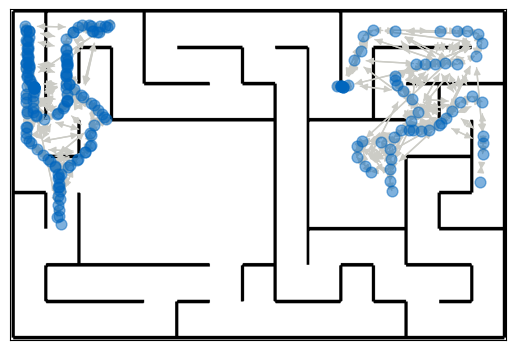

In [10]:
import networkx
new_map = LifelongCognitiveMap(reachability_estimator=None, debug=False)
new_graph = new_map.node_network
for map in maps:
    for node in map.node_network:
        new_graph.add_node(node, pos=node.pos)
    new_graph.add_edges_from(((*edge_start_and_end, edge) for (edge_start_and_end, edge) in map.node_network.edges.items()))
plot.plotTrajectoryInEnvironment(env_model="Savinov_val3", cognitive_map=new_map, trajectory=False)

In [12]:
new_map.save("disjoint.gpickle")

# Add connections to an existing map

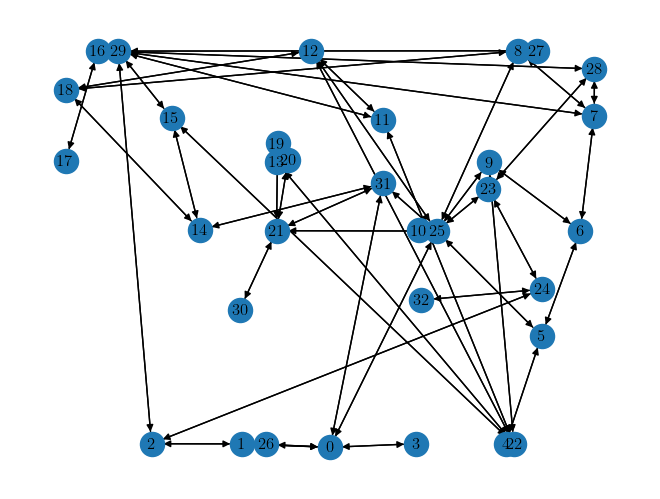

In [4]:
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from='linear_sunburst.after_lifelong_learning.gpickle')
node_network = cognitive_map.node_network

In [33]:
from system.controller.reachability_estimator.reachability_estimation import reachability_estimator_factory
from system.bio_model.cognitive_map import sample_normal

def add_connections_to_map(cognitive_map, re, add=True, remove=False):
    node_network = cognitive_map.node_network

    for i, ni in enumerate(node_network.nodes):
        for j, nj in enumerate(node_network.nodes):
            if i != j:
                reachable, factor = re.get_reachability(ni, nj)
                if reachable and add and (nj not in node_network[ni] or 'connectivity_probability' not in node_network.edges[nj, ni]):
                    cognitive_map.add_bidirectional_edge_to_map(
                        ni, nj,
                        w=sample_normal(1-factor, cognitive_map.sigma),
                        connectivity_probability=re.get_connectivity_probability(factor),
                        mu=1-factor,
                        sigma=cognitive_map.sigma,
                    )
                if not reachable and remove and (nj in node_network[ni]):
                    cognitive_map.remove_bidirectional_edge(ni, nj)

-1.6605271169857387 True
Calling add_bidirectional_edge_to_map
-3.373829729639197 False
-1.6304049620064185 True
Calling add_bidirectional_edge_to_map
-3.323562518231655 False
-4.294639873772683 False
-5.621611454202054 False
-6.825096165220245 False
-6.599535121752264 False
-4.995256773504015 False
-3.4758154785253605 False
-4.696118741018589 False
-5.570620333976805 False
-4.117150719948521 False
-3.91666916599033 False
-5.501759228701245 False
-7.082907587207716 False
-6.412198858348043 False
-1.7136280351687194 True
Calling add_bidirectional_edge_to_map
-3.2894408874897025 False
-4.983012635367989 False
-5.859456063494074 False
-7.055458875176517 False
-8.091876446197643 False
-7.589927336410866 False
-6.1065408173000915 False
-4.487754826049198 False
-5.26218075961054 False
-5.66187244025421 False
-4.001459452583397 False
-3.1043993283078444 False
-4.757687617837732 False
-6.149077109602019 False
-5.185337138766107 False
-3.373829729639197 False
-5.003066555465116 False
-6.6966389

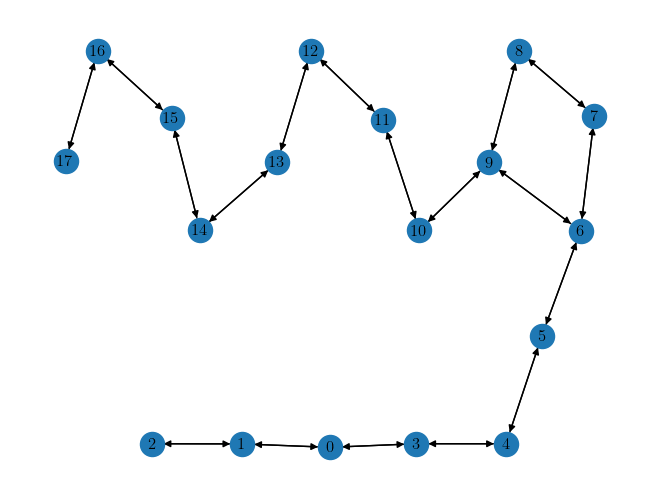

In [4]:
re = reachability_estimator_factory('distance')
re.threshold_reachable = -2

add_connections_to_map(cognitive_map, re)

cognitive_map.draw()

In [5]:
cognitive_map.save('linear_sunburst.after_exploration.gpickle', absolute_path=False)

# Adding nodes and edges to a map

In [20]:
cognitive_map = LifelongCognitiveMap(reachability_estimator=None, load_data_from='linear_sunburst.after_exploration.gpickle')
node_network = cognitive_map.node_network

In [21]:
plt.switch_backend('tk')
plot.plotTrajectoryInEnvironment(env_model='linear_sunburst', cognitive_map=cognitive_map, trajectory=False)

clicks = []
while True:
    click = plt.ginput()
    if not click:
        break
    plt.plot(click[0][0], click[0][1], 'ro')
    clicks += click
clicks

[(1.541666666666667, 5.779761904761905),
 (3.416666666666667, 5.86904761904762),
 (5.470238095238097, 6.047619047619049),
 (7.5238095238095255, 5.958333333333334),
 (5.470238095238097, 7.446428571428573),
 (1.5714285714285712, 7.595238095238097),
 (8.416666666666668, 7.565476190476192),
 (7.5238095238095255, 9.91666666666667),
 (3.178571428571429, 9.886904761904765),
 (9.250000000000002, 7.357142857142859),
 (9.250000000000002, 7.357142857142859)]

In [22]:
plt.switch_backend('inline')
from system.bio_model.place_cell_model import PlaceCell
from system.controller.local_controller.local_navigation import create_gc_spiking, setup_gc_network
from system.controller.reachability_estimator.data_generation.dataset import place_info
from system.controller.simulation.pybullet_environment import PybulletEnvironment

env = PybulletEnvironment('linear_sunburst', visualize=False, contains_robot=False)
gc_network = setup_gc_network(dt=env.dt)

for pos in clicks:
    angle = 0
    spiking = create_gc_spiking(start=(0, 0), goal=pos, gc_network_at_start=gc_network, plotting=False)
    data = place_info((pos, angle, spiking), env)
    pc = PlaceCell.from_data(data)
    cognitive_map.add_node_to_map(pc)
plot.plotTrajectoryInEnvironment(env_model='linear_sunburst', cognitive_map=cognitive_map, trajectory=False)

Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map
Calling add_node_to_map


In [57]:
re = reachability_estimator_factory('view_overlap', env_model='linear_sunburst')
re.threshold_reachable = 0.2

from functools import wraps
import numpy as np
def _wrap(fun):
    @wraps(fun)
    def _wrapper(p1, p2):
        if np.linalg.norm(np.array(p1.pos) - np.array(p2.pos)) > 2:
            return False, 0
        return fun(p1, p2)
    return _wrapper
re.get_reachability = _wrap(re.get_reachability)

add_connections_to_map(cognitive_map, re, add=True, remove=True)

Calling remove_bidirectional_edge
deleting edge [0-19]: conn 0.39
Calling add_bidirectional_edge_to_map
Calling remove_bidirectional_edge
deleting edge [0-21]: conn 0.38
Calling remove_bidirectional_edge
deleting edge [1-20]: conn 0.33999999999999997
Calling remove_bidirectional_edge
deleting edge [2-18]: conn 0.54
Calling add_bidirectional_edge_to_map
Calling remove_bidirectional_edge
deleting edge [4-27]: conn 0.28
Calling remove_bidirectional_edge
deleting edge [5-24]: conn 0.26
Calling remove_bidirectional_edge
deleting edge [6-7]: conn 0.5650000000000001
Calling add_bidirectional_edge_to_map
Calling add_bidirectional_edge_to_map
Calling remove_bidirectional_edge
deleting edge [7-9]: conn 0.21000000000000002
Calling remove_bidirectional_edge
deleting edge [8-11]: conn 0.5750000000000001
Calling remove_bidirectional_edge
deleting edge [8-24]: conn 0.375
Calling add_bidirectional_edge_to_map
Calling remove_bidirectional_edge
deleting edge [9-25]: conn 0.35000000000000003
Calling remo

In [58]:
cognitive_map.draw()

In [59]:
cognitive_map.save("linear_sunburst.handcrafted.gpickle")